# (top)

In [1]:
# 1tag: m0=125.0 +/- 0.5%
# sigma = 1.53 +/- 10.8%
# m0 systematic: “EG_SCALE”
# sigma systematic: “EG_RESOLUTION”


# sigma = 1.53 +/- 10.8% (EG_RESOLUTION) +/- 3% (EG_SCALE)
# sigma_0  (1 + 0.108*theta_EG_RES)  (1 + 0.03*theta_EG_SCALE)
# `m_0 * (1 + 0.005*theta_EG_SCALE)`
# 2-tag:   m0 = 125.0
# m0 +/- 0.5% (EG_SCALE)
# sigma = 1.46
# +/- 11% (EG_RES) +/- 2% (EG_SCALE)
# yield on 2H 1tag: +/- 4% (theta_YIELD)
# yield on 2H 2tag: +/- 10% (theta_YIELD)

In [2]:
import ROOT
import ROOT.RooFit as rf
#import rootnotes
import numpy as np
import matplotlib.pyplot as plt
from root_numpy import array2tree, hist2array
from rootpy.io import root_open
%matplotlib inline

Welcome to JupyROOT 6.08/02


Import compile Double Sided Crystal Ball function

In [3]:
from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "../56_Hbbyy/inc/HggTwoSidedCBPdf.h"')
gSystem.Load('../56_Hbbyy/libDH.so')

0

In [4]:
#c1=rootnotes.default_canvas()
#%jsroot on

In [5]:
# Declare observable x: myy, the diphoton mass
myy = ROOT.RooRealVar("myy", "m_yy", 105, 160)

Get histograms from Leo's file

In [6]:
f = root_open('combined_backgrounds_20170201.root')
histos_bkg = {k.GetName(): f.Get(k.GetName()) for k in f.GetListOfKeys()}

In [7]:
# Create a binned dataset that imports contents of TH1 and associates its contents to observable 'x'
# 0 tag: nonHiggs bkg + single Higgs bkg
# 1,2 tags: nonHiggs bkg + single Higgs bkg + diHiggs signal

dh_bkg_noH_0tag_highmass = ROOT.RooDataHist(
    "0tag_highmass_bkg_nonHiggs", "0tag_highmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_noH_1tag_highmass = ROOT.RooDataHist(
    "1tag_highmass_bkg_nonHiggs", "1tag_highmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_noH_2tag_highmass = ROOT.RooDataHist(
    "2tag_highmass_bkg_nonHiggs", "2tag_highmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_1H_0tag_highmass = ROOT.RooDataHist(
    "0tag_highmass_bkg_1Higgs", "0tag_highmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs'])
dh_bkg_1H_1tag_highmass = ROOT.RooDataHist(
    "1tag_highmass_bkg_1Higgs", "1tag_highmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_single_Higgs'])
dh_bkg_1H_2tag_highmass = ROOT.RooDataHist(
    "2tag_highmass_bkg_1Higgs", "2tag_highmass_bkg_1Higgs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_single_Higgs'])

dh_bkg_noH_0tag_lowmass = ROOT.RooDataHist(
    "0tag_lowmass_bkg_nonHiggs", "0tag_lowmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_noH_1tag_lowmass = ROOT.RooDataHist(
    "1tag_lowmass_bkg_nonHiggs", "1tag_lowmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_noH_2tag_lowmass = ROOT.RooDataHist(
    "2tag_lowmass_bkg_nonHiggs", "2tag_lowmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs'])
dh_bkg_1H_0tag_lowmass = ROOT.RooDataHist(
    "0tag_lowmass_bkg_1Higgs", "0tag_lowmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs'])
dh_bkg_1H_1tag_lowmass = ROOT.RooDataHist(
    "1tag_lowmass_bkg_1Higgs", "1tag_lowmass_bkg_nonHiggs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_single_Higgs'])
dh_bkg_1H_2tag_lowmass = ROOT.RooDataHist(
    "2tag_lowmass_bkg_1Higgs", "2tag_lowmass_bkg_1Higgs",
    ROOT.RooArgList(myy), histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_single_Higgs'])

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(0tag_highmass_bkg_nonHiggs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(1tag_highmass_bkg_nonHiggs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(2tag_highmass_bkg_nonHiggs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(0tag_highmass_bkg_1Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(1tag_highmass_bkg_1Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(2tag_highmass_bkg_1Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160

^ are these the full backgrounds with templates? or only the sharpa ones?

Fit to the 0 tag category to get the parameters:

In [8]:
# -- create a workspace
w = ROOT.RooWorkspace('w')

In [9]:
# -- import the variable myy created above
getattr(w,'import')(myy)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::myy


In [10]:
# - build model with nuisance params, global observable, categories, ...
# - do fit on MC, fix fit function params 
# - build two model configs, one for B, one for S+B
# - make two asimov datasets for mu=0, mu=1 (?)
# - use hypothesis test inverter with asymptotic calculator to get CL

Build generic background PDF with $\texttt{epoly2}$ function: $$PDF_\text{bkg} = exp(a_0 + a_1x + a_2x^2)$$
Set $a_0=1$ and include the normalization factor later by extending the PDF. 

In [11]:
# -- epoly background (b = e^(a0+a1*x+a2*x^2))
w.factory("PolyVar::bkg_exponent(myy,{a0[1], a1[-100, 100], a2[-100, 100]})")
w.factory("Exponential::bkg_pdf(bkg_exponent,1)")
w.var('a0').setConstant(True)

In [12]:
# -- old exponential background (b = e^(cx))
# c0_bkg = ROOT.RooRealVar('c0_bkg', 'coefficient c0 of exponential bkg fit', -100, 100)
# bkg_pdf = ROOT.RooExponential('bkg_pdf', 'exponential bkg pdf', myy, c0_bkg)

Build generic signal PDF with Double Sided CB function:

In [13]:
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 125, 105, 160)
sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 5, 0, 2000)
alphaLo_cb = ROOT.RooRealVar('alphaLo_cb','alphaLo_cb', 0, 5)
nLo_cb = ROOT.RooRealVar('nLo_cb','nLo_cb', 0, 10)
alphaHi_cb = ROOT.RooRealVar('alphaHi_cb','alphaHi_cb', 0, 5)
nHi_cb = ROOT.RooRealVar('nHi_cb','nHi_cb', 0, 10)

# -- double sided crystal ball
dscb_pdf = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf', 'Double Sided Crystal Ball',
    myy,
    m0_cb,
    sigma_cb,
    alphaLo_cb,
    nLo_cb,
    alphaHi_cb,
    nHi_cb
)

In [14]:
# -- import the DSCB function into the workspace
getattr(w,'import')(dscb_pdf)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaLo_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nLo_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaHi_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nHi_cb


Fit the non-Higgs background function to the high mass and low mass binned data individually to find the values of $a_1$ and $a_2$ that will be applied to the corresponding 1 and 2 tag categories.

In [15]:
# low mass fit
r = w.pdf("bkg_pdf").fitTo(dh_bkg_noH_0tag_lowmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1           0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
     2 a2           0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
[#0] WARNING:I

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_lowmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


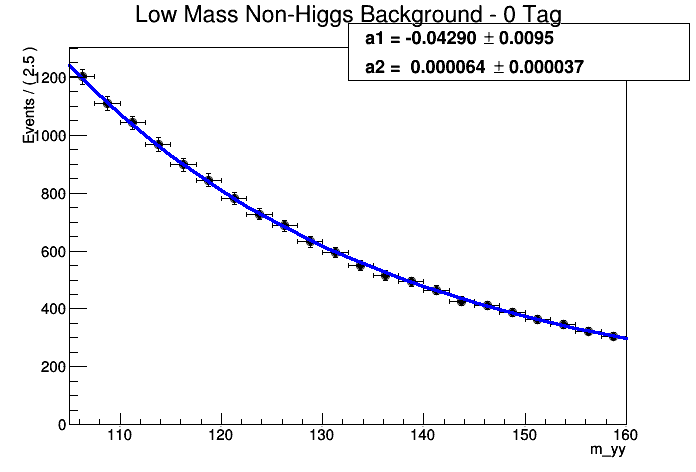

In [16]:
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_0tag_lowmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 0 Tag")
c.Draw()

Save a snapshot of the values of $a_1$ and $a_2$ that were found by fitting the low mass non-Higgs background in the 0 tag category. These values will be frozen for the 1 and 2 tag categories.

In [17]:
w.defineSet("params_epoly2", "a1,a2")
w.saveSnapshot("lowmass_epoly2",w.set("params_epoly2"), ROOT.kTRUE)

True

Redo the fit for the high mass category:

In [18]:
# high mass fit
r = w.pdf("bkg_pdf").fitTo(dh_bkg_noH_0tag_highmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1          -4.29004e-02  9.51067e-03   -1.00000e+02  1.00000e+02
     2 a2           6.35874e-05  3.65609e-05   -1.00000e+02  1.00000e+02
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           1
 **********
 **********
 **   17 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   18 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=4391.26 F

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_highmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


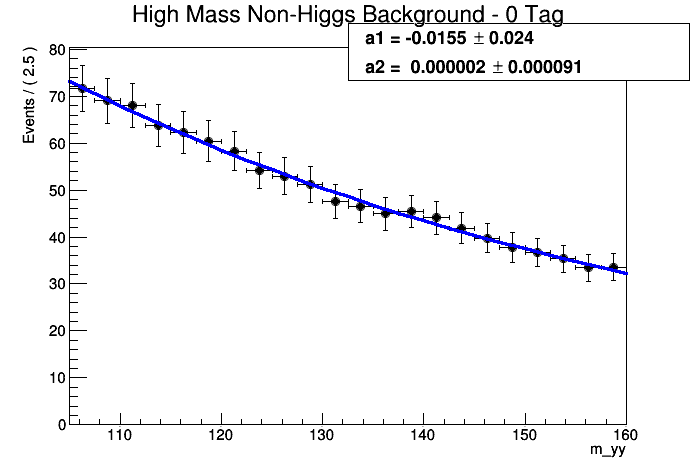

In [19]:
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_0tag_highmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 0 Tag")
c.Draw()

In [20]:
w.saveSnapshot("highmass_epoly2",w.set("params_epoly2"), ROOT.kTRUE)

True

In [21]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(a0,a1,a2,alphaHi_cb,alphaLo_cb,m0_cb,myy,nHi_cb,nLo_cb,sigma_cb)

p.d.f.s
-------
RooExponential::bkg_pdf[ x=bkg_exponent c=1 ] = 0.364423
HggTwoSidedCBPdf::dscb_pdf[ m=myy m0=m0_cb sigma=sigma_cb alphaLo=alphaLo_cb nLo=nLo_cb alphaHi=alphaHi_cb nHi=nHi_cb ] = 0.324652

functions
--------
RooPolyVar::bkg_exponent[ x=myy coefList=(a0,a1,a2) ] = -1.00944

parameter snapshots
-------------------
lowmass_epoly2 = (a1=-0.0429004 +/- 0.00951067,a2=6.35874e-05 +/- 3.65609e-05)
highmass_epoly2 = (a1=-0.0154718 +/- 0.0238383,a2=2.31129e-06 +/- 9.08521e-05)

named sets
----------
params_epoly2:(a1,a2)



The cells below have been commented out. They tested the idea of doing a simultaneous fit in the high and low mass categories, which is of course a bad idea given that the two have different shapes.

In [22]:
# -- individual fit to single higgs bkg
#w.pdf("dscb_pdf").fitTo(dh_bkg_1H_0tag_lowmass, rf.SumW2Error(ROOT.kTRUE))

In [23]:
#w.factory("tag0cat[tag0low,tag0high]")

In [24]:
# from copy import deepcopy
# noH_0tag_combo = ROOT.RooDataHist("combData", "combined data", ROOT.RooArgList(myy),
#                             rf.Index(w.cat("tag0cat")),
#                             rf.Import("tag0low", dh_bkg_noH_0tag_lowmass),
#                             rf.Import("tag0high", dh_bkg_noH_0tag_highmass))


In [25]:
# #w.factory("SIMUL:noH_0tag_jointmodel(tag0cat,tag0low=bkg_pdf,tag0high=bkg_pdf)")
# w.factory("SIMUL:noH_0tag_jointmodel(\
#     tag0cat,\
#     tag0low = ExtendPdf:pdf_low(bkg_pdf, n_low[100, 0, 100000]),\
#     tag0high = ExtendPdf:pdf_high(bkg_pdf, n_high[100, 0, 100000]))"
# )
# #ExtendPdf:pdf(gaus, nevt[100,0,100000])
# # Simultaneous p.d.f.s are constructed with SIMUL( index, state1=pdf1, state2=pdf2,...)
# # w->factory("SIMUL::smodel( c[A=0,B=1], A=Gaussian::gs(x,m,s[1]), B=Landau::ls(x,0,1) )")

In [26]:
# c1 = ROOT.TCanvas()
# plot1 = myy.frame()
# plot2 = myy.frame()

# r = w.pdf("noH_0tag_jointmodel").fitTo(noH_0tag_combo, rf.Save(), rf.SumW2Error(ROOT.kTRUE))
# r.Print()

# #dh_bkg_noH_0tag_lowmass.plotOn(plot1, rf.MarkerColor(ROOT.kRed))
# noH_0tag_combo.plotOn(plot1, ROOT.RooFit.Cut("tag0cat==tag0cat::tag0low"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot1, rf.ProjWData(noH_0tag_combo), rf.Slice(w.cat("tag0cat"),"tag0low"))

# #dh_bkg_noH_0tag_highmass.plotOn(plot2)
# noH_0tag_combo.plotOn(plot2, ROOT.RooFit.Cut("tag0cat==tag0cat::tag0high"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot2, rf.ProjWData(noH_0tag_combo), rf.Slice(w.cat("tag0cat"),"tag0high"))

In [27]:
# plot1.Draw()
# c1.Draw()

In [28]:
# plot2.Draw()
# c1.Draw()

In [29]:
# --> conclusion: fit high and low mass separately, not simultaneously

In [30]:
# # -- generate fake data and re-fit it
# data = w.pdf("noH_0tag_jointmodel").generate(ROOT.RooArgSet(myy,w.cat("tag0cat")))
# data.SetName("data")
# getattr(w,'import')(data)
# data.Print()

In [31]:
# c = ROOT.TCanvas()
# plot1 = myy.frame(ROOT.RooFit.Title("Channel 1"))
# plot2 = myy.frame(ROOT.RooFit.Title("Channel 2"))
# data.plotOn(plot1,ROOT.RooFit.Cut("tag0cat==tag0cat::tag0low"))
# data.plotOn(plot2,ROOT.RooFit.Cut("tag0cat==tag0cat::tag0high"))
# r = w.pdf("noH_0tag_jointmodel").fitTo(data, rf.SumW2Error(ROOT.kTRUE), rf.Save())
# w.pdf("noH_0tag_jointmodel").plotOn(plot1,ROOT.RooFit.ProjWData(data),ROOT.RooFit.Slice(w.cat("tag0cat"),"tag0low"))
# w.pdf("noH_0tag_jointmodel").plotOn(plot2,ROOT.RooFit.ProjWData(data),ROOT.RooFit.Slice(w.cat("tag0cat"),"tag0high"))
# c.Divide(1,2)
# c.cd(1)
# plot1.Draw()
# c.cd(2)
# plot2.Draw()
# c.Draw()

Check how well these fit the 1 and 2 tag categories:

[#1] INFO:InputArguments -- RooAbsData::plotOn(1tag_highmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(2tag_highmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


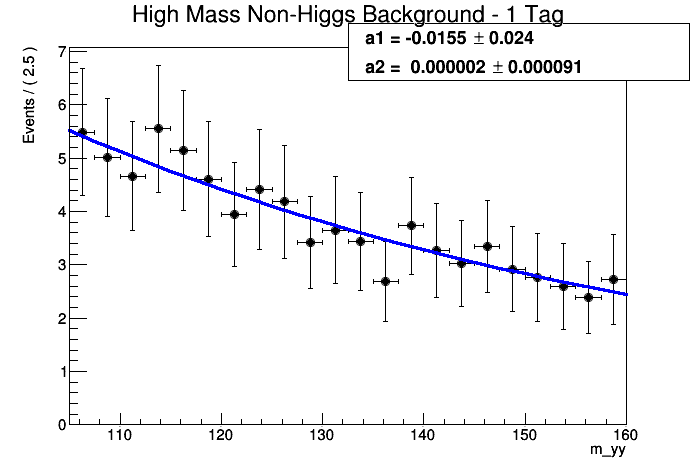

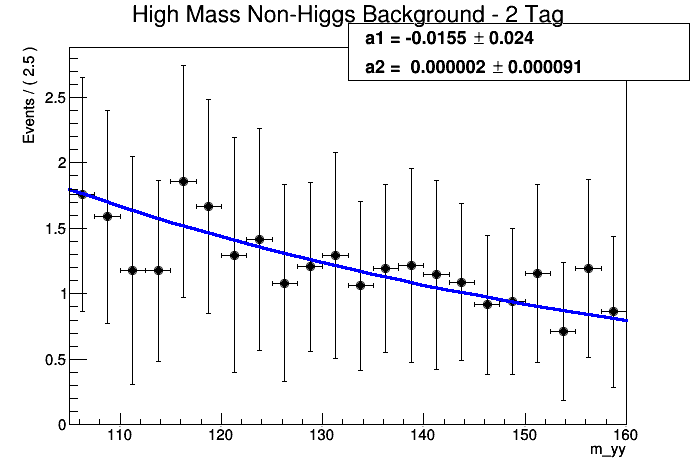

In [32]:
# -- high mass (keep a1 and a2 values we just found)
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_1tag_highmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_2tag_highmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Non-Higgs Background - 2 Tag")
c1.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(1tag_lowmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(2tag_lowmass_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)


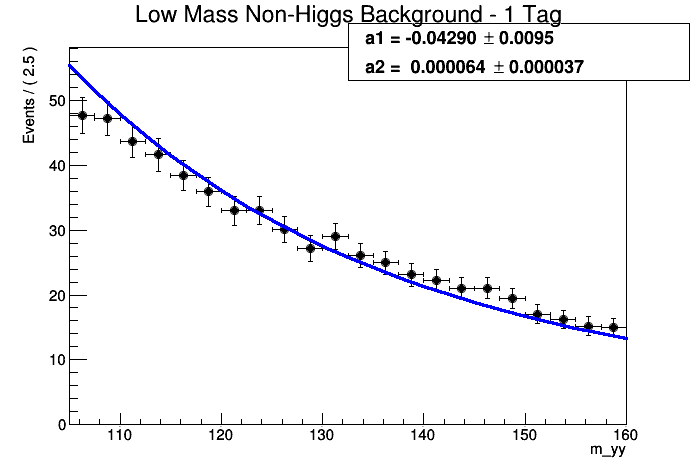

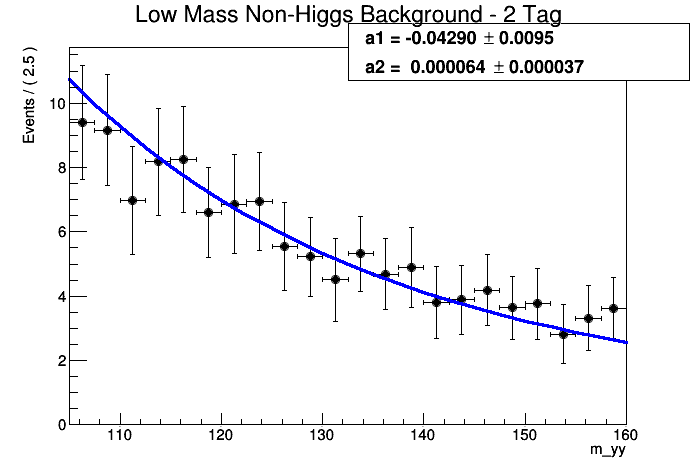

In [33]:
# -- low mass (restore previous snapshot)
w.loadSnapshot("lowmass_epoly2")
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_1tag_lowmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_noH_2tag_lowmass.plotOn(frame)
w.pdf("bkg_pdf").plotOn(frame)
w.pdf("bkg_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Non-Higgs Background - 2 Tag")
c1.Draw()

These look less than ideal. How can we quantify this?

Do the same for the DSCB function that represents the single-Higgs background. Fit it in the 0 tag category (high mass and low mass separately) and then check how that fits the 1 and 2 tag categories. The difference here is that we will only fix the $\alpha$ and $n$ parameters, while we we let $m_0$ and $\sigma$ float with every fit.

In [34]:
# low mass fit
r = w.pdf("dscb_pdf").fitTo(dh_bkg_1H_0tag_lowmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     2 alphaLo_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     3 m0_cb        1.25000e+02  5.50000e+00    1.05000e+02  1.60000e+02
     4 nHi_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 nLo_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     6 sigma_cb     5.00000e+00  2.50000e+00    0.00000e+00  2.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        3000           1
 *********

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_lowmass_bkg_1Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


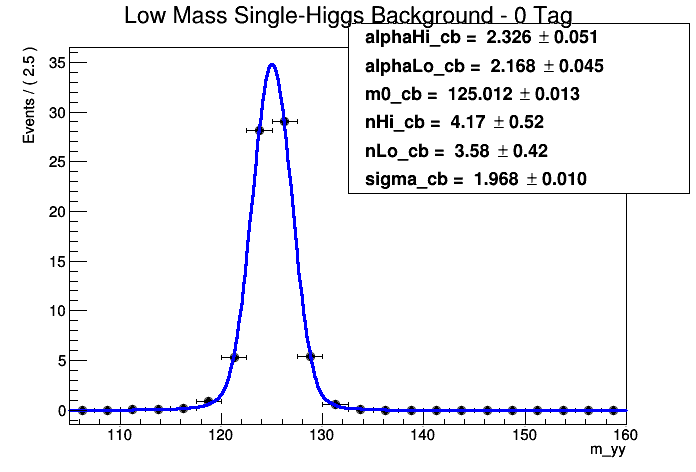

In [35]:
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_0tag_lowmass.plotOn(frame)
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 0 Tag")
c.Draw()

In [36]:
w.defineSet("params_dscb", "alphaHi_cb,alphaLo_cb,nHi_cb,nLo_cb")
w.saveSnapshot("lowmass_cb", w.set("params_dscb"))

True

In [37]:
w.pdf("dscb_pdf").fitTo(dh_bkg_1H_0tag_highmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())

<ROOT.RooFitResult object ("fitresult_dscb_pdf_0tag_highmass_bkg_1Higgs") at 0x7f8b19880a90>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   2.32595e+00  5.13914e-02    0.00000e+00  5.00000e+00
     2 alphaLo_cb   2.16784e+00  4.49640e-02    0.00000e+00  5.00000e+00
     3 m0_cb        1.25012e+02  1.27136e-02    1.05000e+02  1.60000e+02
     4 nHi_cb       4.17267e+00  5.23425e-01    0.00000e+00  1.00000e+01
     5 nLo_cb       3.57625e+00  4.16220e-01    0.00000e+00  1.00000e+01
     6 sigma_cb     1.96751e+00  1.00546e-02    0.00000e+00  2.00000e+03
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           1
 **********
 **********
 **   17 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   18 **MIGRAD        3000           1
 *********

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_highmass_bkg_1Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


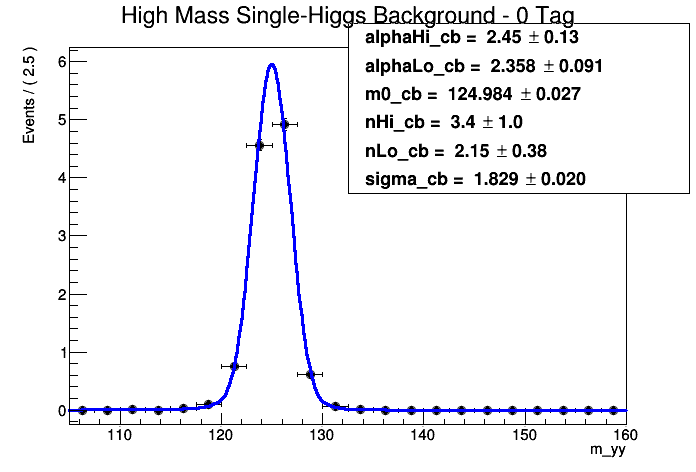

In [38]:
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_0tag_highmass.plotOn(frame)
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 0 Tag")
c.Draw()

In [39]:
w.saveSnapshot("highmass_cb", w.set("params_dscb"))

True

In [40]:
w.loadSnapshot("highmass_cb")

True

In [41]:
def wrap_iter(it):
    elem = it.Next()
    while elem:
        yield elem
        elem = it.Next()

In [42]:
# -- setting parameters to constant
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())]

[('alphaHi_cb', None),
 ('alphaLo_cb', None),
 ('nHi_cb', None),
 ('nLo_cb', None)]

[#1] INFO:InputArguments -- RooAbsData::plotOn(1tag_highmass_bkg_1Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24984e+02  2.67581e-02    1.05000e+02  1.60000e+02
     2 sigma_cb     1.82894e+00  2.04022e-02    0.00000e+00  2.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN E

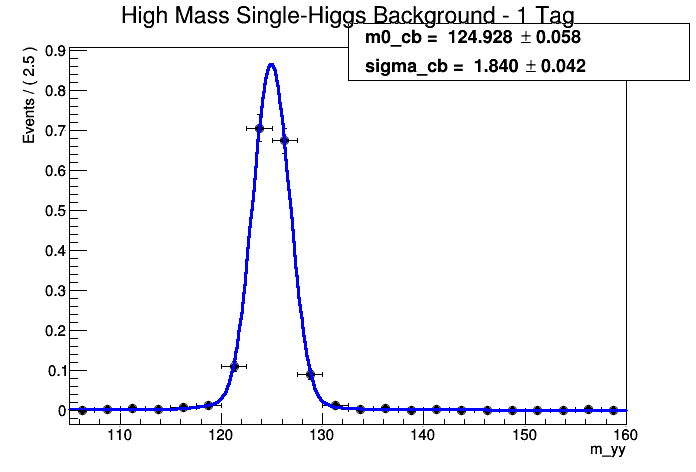

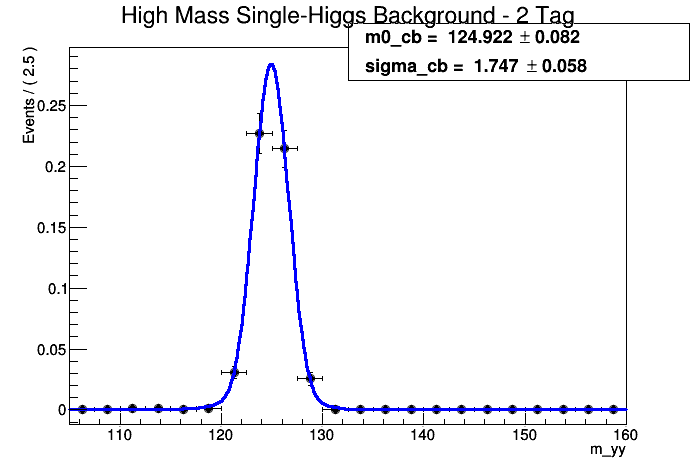

In [43]:
# -- high mass (keep a1 and a2 values we just found)
c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_1tag_highmass.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(dh_bkg_1H_1tag_highmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_2tag_highmass.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(dh_bkg_1H_2tag_highmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("High Mass Single-Higgs Background - 2 Tag")
c1.Draw()

[#1] INFO:InputArguments -- RooAbsData::plotOn(1tag_lowmass_bkg_1Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   25 **SET PRINT           1
 **********
 **********
 **   26 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24922e+02  8.24060e-02    1.05000e+02  1.60000e+02
     2 sigma_cb     1.74675e+00  5.75834e-02    0.00000e+00  2.00000e+03
 **********
 **   27 **SET ERR         0.5
 **********
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   30 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN ED

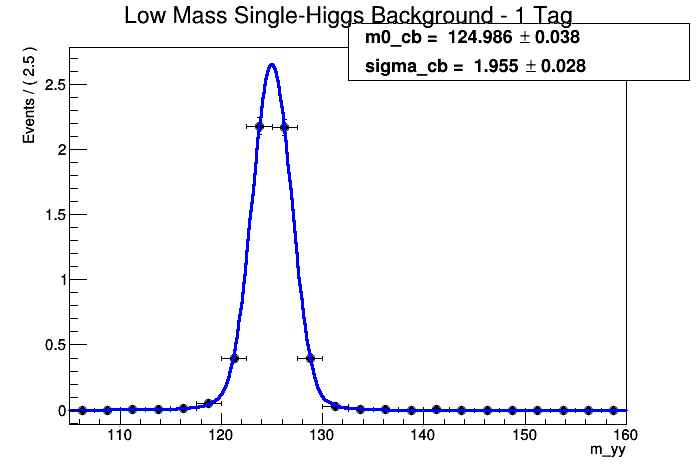

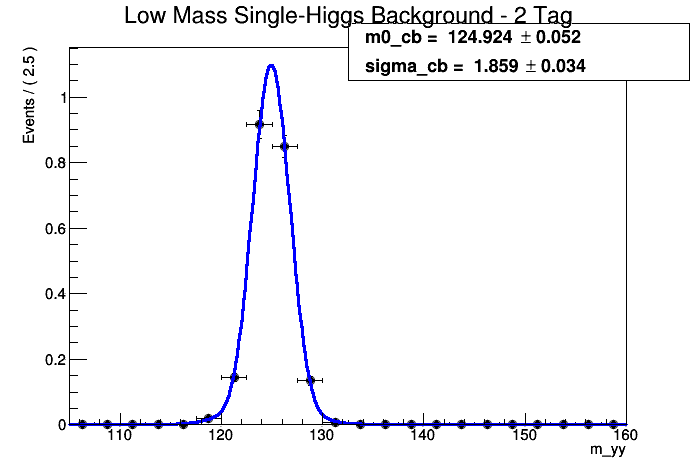

In [44]:
# -- low mass (load previous snapshot)
w.loadSnapshot("lowmass_cb")
# -- setting parameters to constant
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())]

c = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_1tag_lowmass.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(dh_bkg_1H_1tag_lowmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 1 Tag")
c.Draw()
c1 = ROOT.TCanvas()
frame = myy.frame()
dh_bkg_1H_2tag_lowmass.plotOn(frame)
r = w.pdf("dscb_pdf").fitTo(dh_bkg_1H_2tag_lowmass, rf.SumW2Error(ROOT.kTRUE), rf.Save())
w.pdf("dscb_pdf").plotOn(frame)
w.pdf("dscb_pdf").paramOn(frame)#,ROOT.RooFit.Layout(0.65,0.85,0.85),ROOT.RooFit.Parameters(ROOT.RooArgSet(w.var("a1"),w.var("nbkg1"))))
frame.Draw()
frame.SetTitle("Low Mass Single-Higgs Background - 2 Tag")
c1.Draw()

# Build full model

In [45]:
w.factory("cat[tag0low, tag0high, tag1low, tag1high, tag2low, tag2high]")

<ROOT.RooCategory object ("cat") at 0x7f8b15f29000>

In [46]:
from copy import deepcopy

def _add(h1, h2):
    res = deepcopy(h1)
    res.add(h2)
    return res

# data_tag0low = deepcopy(dh_bkg_noH_0tag_lowmass)
# data_tag0low.add(dh_bkg_1H_0tag_lowmass)
# data_tag0high = deepcopy(dh_bkg_noH_0tag_highmass)
# data_tag0high.add(dh_bkg_1H_0tag_highmass)
# data_tag1low = deepcopy(dh_bkg_noH_1tag_lowmass)
# data_tag1low.add(dh_bkg_1H_1tag_lowmass)
# data_tag1high = deepcopy(dh_bkg_noH_1tag_highmass)
# data_tag1high.add(dh_bkg_1H_1tag_highmass)
# data_tag2low = deepcopy(dh_bkg_noH_2tag_lowmass)
# data_tag2low.add(dh_bkg_1H_2tag_lowmass)
# data_tag2high = deepcopy(dh_bkg_noH_2tag_highmass)
# data_tag2high.add(dh_bkg_1H_2tag_highmass)

In [47]:
blah1 = _add(dh_bkg_noH_0tag_lowmass, dh_bkg_1H_0tag_lowmass)
blah2 = _add(dh_bkg_noH_0tag_highmass, dh_bkg_1H_0tag_highmass)
blah3 = _add(dh_bkg_noH_1tag_lowmass, dh_bkg_1H_1tag_lowmass)
blah4 = _add(dh_bkg_noH_1tag_highmass, dh_bkg_1H_1tag_highmass)
blah5 = _add(dh_bkg_noH_2tag_lowmass, dh_bkg_1H_2tag_lowmass)
blah6 = _add(dh_bkg_noH_2tag_highmass, dh_bkg_1H_2tag_highmass)

In [48]:
data_combo = ROOT.RooDataHist(
    "data_combo", "combined data", ROOT.RooArgList(myy),
    rf.Index(w.cat("cat")),
    rf.Import("tag0low", blah1),#_add(dh_bkg_noH_0tag_lowmass, dh_bkg_1H_0tag_lowmass)),
    rf.Import("tag0high", blah2),#_add(dh_bkg_noH_0tag_highmass, dh_bkg_1H_0tag_highmass)),
    rf.Import("tag1low", blah3),#_add(dh_bkg_noH_1tag_lowmass, dh_bkg_1H_1tag_lowmass)),
    rf.Import("tag1high",blah4),# _add(dh_bkg_noH_1tag_highmass, dh_bkg_1H_1tag_highmass)),
    rf.Import("tag2low", blah5),#_add(dh_bkg_noH_2tag_lowmass, dh_bkg_1H_2tag_lowmass)),
    rf.Import("tag2high",blah6),# _add(dh_bkg_noH_2tag_highmass, dh_bkg_1H_2tag_highmass))
)

In [49]:
w.factory("mu_1H[1]")#, 0, 100]")
w.factory("mu_2H[1, 0, 20]")
w.factory("EG_SCALE[-10, 10]")
w.factory("EG_RES[-10, 10]")
w.factory("theta_yield[-10, 10]")
w.factory("n_bias_tag2high_2H[-100, 100]")
w.factory("n_bias_tag1high_2H[-100, 100]")
w.factory("n_bias_tag2low_2H[-100, 100]")
w.factory("n_bias_tag1low_2H[-100, 100]")

<ROOT.RooRealVar object ("n_bias_tag1low_2H") at 0x7f8b196ee4b0>

In [50]:
w.factory("Gaussian::EG_SCALE_gaussian(EG_SCALE, EG_SCALE_global[0], 1)")
w.factory("Gaussian::EG_RES_gaussian(EG_RES, EG_RES_global[0], 1)")
w.factory("Gaussian::theta_yield_gaussian(theta_yield, theta_yield_global[0], 1)")
w.factory("Gaussian::n_bias_tag2high_2H_gaussian(n_bias_tag2high_2H, n_bias_tag2high_2H_global[0], 0.001)")
w.factory("Gaussian::n_bias_tag1high_2H_gaussian(n_bias_tag1high_2H, n_bias_tag1high_2H_global[0], 0.001)")
w.factory("Gaussian::n_bias_tag2low_2H_gaussian(n_bias_tag2low_2H, n_bias_tag2low_2H_global[0], 0.001)")
w.factory("Gaussian::n_bias_tag1low_2H_gaussian(n_bias_tag1low_2H, n_bias_tag1low_2H_global[0], 0.001)")

<ROOT.RooGaussian object ("n_bias_tag1low_2H_gaussian") at 0x7f8b14f49c00>

In [51]:
w.factory("expr::coeff_1H('mu_1H * (1 + 0.04 * theta_yield)', mu_1H, theta_yield)")
w.factory("expr::coeff_2H('mu_2H * (1 + 0.1 * theta_yield)', mu_2H, theta_yield)")

<ROOT.RooFormulaVar object ("coeff_2H") at 0x7f8b1453c600>

In [52]:
# -- check that integral and sum of weights actually give the same answer
# this should be 0 if the two are the same for all histograms in histos_bkg
sum([(v.Integral() != v.GetSumOfWeights()) for k,v in histos_bkg.iteritems()])

0

In [53]:
histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'].Integral()

1098.9999999999984

In [54]:
n_tag2high_0H = ROOT.RooRealVar("n_tag2high_0H", "n_tag2high_0H", histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
n_tag1high_0H = ROOT.RooRealVar("n_tag1high_0H", "n_tag1high_0H", histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
n_tag0high_0H = ROOT.RooRealVar("n_tag0high_0H", "n_tag0high_0H", histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())

n_tag2high_1H_exp = ROOT.RooRealVar("n_tag2high_1H_exp", "n_tag2high_1H_exp", histos_bkg['m_yy_highMass_2tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
n_tag1high_1H_exp = ROOT.RooRealVar("n_tag1high_1H_exp", "n_tag1high_1H_exp", histos_bkg['m_yy_highMass_1tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
n_tag0high_1H_exp = ROOT.RooRealVar("n_tag0high_1H_exp", "n_tag0high_1H_exp", histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())

n_tag2high_2H_exp = ROOT.RooRealVar("n_tag2high_2H_exp", "n_tag2high_2H_exp", 122.3) # correct up to a constant
n_tag1high_2H_exp = ROOT.RooRealVar("n_tag1high_2H_exp", "n_tag1high_2H_exp", 85.1) # correct up to a constant


n_tag2low_0H = ROOT.RooRealVar("n_tag2low_0H", "n_tag2low_0H", histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
n_tag1low_0H = ROOT.RooRealVar("n_tag1low_0H", "n_tag1low_0H", histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())
n_tag0low_0H = ROOT.RooRealVar("n_tag0low_0H", "n_tag0low_0H", histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs'].GetSumOfWeights())

n_tag2low_1H_exp = ROOT.RooRealVar("n_tag2low_1H_exp", "n_tag2low_1H_exp", histos_bkg['m_yy_lowMass_2tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
n_tag1low_1H_exp = ROOT.RooRealVar("n_tag1low_1H_exp", "n_tag1low_1H_exp", histos_bkg['m_yy_lowMass_1tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())
n_tag0low_1H_exp = ROOT.RooRealVar("n_tag0low_1H_exp", "n_tag0low_1H_exp", histos_bkg['m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs'].GetSumOfWeights())

n_tag2low_2H_exp = ROOT.RooRealVar("n_tag2low_2H_exp", "n_tag2low_2H_exp", 122.3) # don't have low mass number, use high mass
n_tag1low_2H_exp = ROOT.RooRealVar("n_tag1low_2H_exp", "n_tag1low_2H_exp", 85.1) # don't have low mass number, use high mass



getattr(w, 'import')(
    ROOT.RooArgSet(
        n_tag2high_1H_exp,
        n_tag1high_1H_exp,
        n_tag0high_1H_exp,
        n_tag2high_2H_exp,
        n_tag1high_2H_exp,
        n_tag2low_1H_exp,
        n_tag1low_1H_exp,
        n_tag0low_1H_exp,
        n_tag2low_2H_exp
    )
)

getattr(w, 'import')(
    ROOT.RooArgSet(
        n_tag1low_2H_exp,
        n_tag2high_0H,
        n_tag1high_0H,
        n_tag0high_0H,
        n_tag2low_0H,
        n_tag1low_0H,
        n_tag0low_0H
    )
) # cannot import them all together because an ArgSet takes at most 10 elements :O


False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag2high_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag1high_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag0high_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag2high_2H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag1high_2H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag2low_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag1low_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag0low_1H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag2low_2H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag1low_2H_exp
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_tag2high_

In [55]:
w.factory("expr::n_tag2high_1H('n_tag2high_1H_exp * coeff_1H', n_tag2high_1H_exp, coeff_1H)")
w.factory("expr::n_tag1high_1H('n_tag1high_1H_exp * coeff_1H', n_tag1high_1H_exp, coeff_1H)")
w.factory("expr::n_tag0high_1H('n_tag0high_1H_exp * coeff_1H', n_tag0high_1H_exp, coeff_1H)")

w.factory("expr::n_tag2low_1H('n_tag2low_1H_exp * coeff_1H', n_tag2low_1H_exp, coeff_1H)")
w.factory("expr::n_tag1low_1H('n_tag1low_1H_exp * coeff_1H', n_tag1low_1H_exp, coeff_1H)")
w.factory("expr::n_tag0low_1H('n_tag0low_1H_exp * coeff_1H', n_tag0low_1H_exp, coeff_1H)")

w.factory("expr::n_tag2high_2H('n_tag2high_2H_exp * coeff_2H + n_bias_tag2high_2H', n_tag2high_2H_exp, coeff_2H, n_bias_tag2high_2H)")
w.factory("expr::n_tag1high_2H('n_tag1high_2H_exp * coeff_2H + n_bias_tag1high_2H', n_tag1high_2H_exp, coeff_2H, n_bias_tag1high_2H)")

w.factory("expr::n_tag2low_2H('n_tag2low_2H_exp * coeff_2H + n_bias_tag2low_2H', n_tag2low_2H_exp, coeff_2H, n_bias_tag2low_2H)")
w.factory("expr::n_tag1low_2H('n_tag1low_2H_exp * coeff_2H + n_bias_tag1low_2H', n_tag1low_2H_exp, coeff_2H, n_bias_tag1low_2H)")

<ROOT.RooFormulaVar object ("n_tag1low_2H") at 0x7f8b16e7ce00>

In [56]:
w.loadSnapshot("lowmass_epoly2")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_epoly2").iterator())] # probably not needed
w.loadSnapshot("lowmass_cb")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())] # probably not needed

w.factory("PolyVar::bkg_exponent_lowmass(myy,{a0, a1_lowmass[-100, 100], a2_lowmass[-100, 100]})")
w.factory("Exponential::bkg_pdf_lowmass(bkg_exponent_lowmass,1)")

[w.var(a.GetName() + "_lowmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_epoly2").iterator())]
[w.var(a.GetName() + "_lowmass").setConstant(True) for a in wrap_iter(w.set("params_epoly2").iterator())]

# w.factory("HggTwoSidedCBPdf::dscb_pdf_lowmass(\
#           myy,\
#           m0_cb,\
#           sigma_cb,\
#           alphaLo_cb_lowmass[0, 5],\
#           nLo_cb_lowmass[0, 10],\
#           alphaHi_cb_lowmass[0, 5],\
#           nHi_cb_lowmass[0, 10],\
#           )"
# ) # no suitable constructor found (??)
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
m0_cb_tag0low = ROOT.RooRealVar('m0_cb_tag0low','m0_cb_tag0low', 125)
# DON'T HAVE SIGMA FOR 0 TAG, USE 1 TAG
# ALSO, THE NUMBER WE HAVE IS FOR HIGH MASS NOT LOW MASS :(
sigma_cb_tag0low = ROOT.RooRealVar('sigma_cb_tag0low','sigma_cb_tag0low', 1.53) 
m0_cb_tag1low = ROOT.RooRealVar('m0_cb_tag1low','m0_cb_tag1low', 125)
sigma_cb_tag1low = ROOT.RooRealVar('sigma_cb_tag1low','sigma_cb_tag1low', 1.53)
m0_cb_tag2low = ROOT.RooRealVar('m0_cb_tag2low','m0_cb_tag2low', 125)
sigma_cb_tag2low = ROOT.RooRealVar('sigma_cb_tag2low','sigma_cb_tag2low', 1.46)
# values for these variables will be set below
alphaLo_cb_lowmass = ROOT.RooRealVar('alphaLo_cb_lowmass','alphaLo_cb_lowmass', 0, 5)
nLo_cb_lowmass = ROOT.RooRealVar('nLo_cb_lowmass','nLo_cb_lowmass', 0, 10)
alphaHi_cb_lowmass = ROOT.RooRealVar('alphaHi_cb_lowmass','alphaHi_cb_lowmass', 0, 5)
nHi_cb_lowmass = ROOT.RooRealVar('nHi_cb_lowmass','nHi_cb_lowmass', 0, 10)
getattr(w, 'import')(ROOT.RooArgSet(m0_cb_tag0low,
    sigma_cb_tag0low,
    m0_cb_tag1low,
    sigma_cb_tag1low,
    m0_cb_tag2low,
    sigma_cb_tag2low,
))
# NOTE: WE ARE SHARING THE FITTING PARAMETERS ACROSS CATEGORIES, BUT IN REALITY ALL CATEGORIES WILL HAVE 
# THEIR OWN INDIVIDUAL m0, sigma0, alphaHi, alphaLo, nHi, nLo
# ALSO, FOR NOW WE ARE USING THE SAME CB FOR 1 AND 2 HIGGS, BUT THESE WILL IDEALLY BE COMPLETELY DIFFERENT

# -- double sided crystal ball
w.factory("expr::m0_tag0low('m0_cb_tag0low * (1 + 0.005 * EG_SCALE)', m0_cb_tag0low, EG_SCALE)")
w.factory("expr::m0_tag1low('m0_cb_tag1low * (1 + 0.005 * EG_SCALE)', m0_cb_tag1low, EG_SCALE)")
w.factory("expr::m0_tag2low('m0_cb_tag2low * (1 + 0.5 * EG_SCALE)', m0_cb_tag2low, EG_SCALE)")

w.factory("expr::sigma_tag1low('sigma_cb_tag1low * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag1low, EG_RES, EG_SCALE)")
w.factory("expr::sigma_tag0low('sigma_cb_tag0low * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag0low, EG_RES, EG_SCALE)")
w.factory("expr::sigma_tag2low('sigma_cb_tag2low * (1 + 0.10 * EG_RES) * (1 + 0.02 * EG_SCALE)', sigma_cb_tag2low, EG_RES, EG_SCALE)")

    
dscb_pdf_tag0low = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag0low', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag0low"), w.function("sigma_tag0low"),
    alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
) # AGAIN WE DON'T HAVE THE VARIATIONS FOR THE 0 TAG CATEGORY, SO I'M GOING TO USE THE ONE FROM 1 TAG FOR NOW
dscb_pdf_tag1low = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag1low', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag1low"), w.function("sigma_tag1low"),
    alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
)
dscb_pdf_tag2low = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag2low', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag2low"), w.function("sigma_tag2low"),
    alphaLo_cb_lowmass,nLo_cb_lowmass,alphaHi_cb_lowmass,nHi_cb_lowmass
)
getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_tag0low, dscb_pdf_tag1low, dscb_pdf_tag2low))
[w.var(a.GetName() + "_lowmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
[w.var(a.GetName() + "_lowmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

w.factory("expr::n_tag1low_12H('n_tag1low_1H + n_tag1low_2H', n_tag1low_1H, n_tag1low_2H)")
w.factory("expr::n_tag2low_12H('n_tag2low_1H + n_tag2low_2H', n_tag2low_1H, n_tag2low_2H)")

w.factory("SUM:pdf_tag0low(\
   n_tag0low_0H * bkg_pdf_lowmass,\
   n_tag0low_1H * dscb_pdf_tag0low)"
)
w.factory("SUM:pdf_tag1low(\
   n_tag1low_0H * bkg_pdf_lowmass,\
   n_tag1low_12H * dscb_pdf_tag1low)"
)
w.factory("SUM:pdf_tag2low(\
   n_tag2low_0H * bkg_pdf_lowmass,\
   n_tag2low_12H * dscb_pdf_tag2low)"
)

<ROOT.RooAddPdf object ("pdf_tag2low") at 0x7f8b14ff7000>

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag0low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag0low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag1low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag1low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag2low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag2low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf_tag0low
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaLo_cb_lowmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nLo_cb_lowmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaHi_cb_lowmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nHi_cb_lowmass
[#

In [57]:
w.loadSnapshot("highmass_epoly2")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_epoly2").iterator())] # probably not needed
w.loadSnapshot("highmass_cb")
[(a.GetName(), a.setConstant(True)) for a in wrap_iter(w.set("params_dscb").iterator())] # probably not needed

w.factory("PolyVar::bkg_exponent_highmass(myy,{a0, a1_highmass[-100, 100], a2_highmass[-100, 100]})")
w.factory("Exponential::bkg_pdf_highmass(bkg_exponent_highmass,1)")

[w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_epoly2").iterator())]
[w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_epoly2").iterator())]

# w.factory("HggTwoSidedCBPdf::dscb_pdf_lowmass(\
#           myy,\
#           m0_cb,\
#           sigma_cb,\
#           alphaLo_cb_lowmass[0, 5],\
#           nLo_cb_lowmass[0, 10],\
#           alphaHi_cb_lowmass[0, 5],\
#           nHi_cb_lowmass[0, 10],\
#           )"
# ) # no suitable constructor found (??)
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
m0_cb_tag0high = ROOT.RooRealVar('m0_cb_tag0high','m0_cb_tag0high', 125)
sigma_cb_tag0high = ROOT.RooRealVar('sigma_cb_tag0high','sigma_cb_tag0high', 1.53)
m0_cb_tag1high = ROOT.RooRealVar('m0_cb_tag1high','m0_cb_tag1high', 125)
sigma_cb_tag1high = ROOT.RooRealVar('sigma_cb_tag1high','sigma_cb_tag1high', 1.53)
m0_cb_tag2high = ROOT.RooRealVar('m0_cb_tag2high','m0_cb_tag2high', 125)
sigma_cb_tag2high = ROOT.RooRealVar('sigma_cb_tag2high','sigma_cb_tag2high', 1.46)
alphaLo_cb_highmass = ROOT.RooRealVar('alphaLo_cb_highmass','alphaLo_cb_highmass', 0, 5)
nLo_cb_highmass = ROOT.RooRealVar('nLo_cb_highmass','nLo_cb_highmass', 0, 10)
alphaHi_cb_highmass = ROOT.RooRealVar('alphaHi_cb_highmass','alphaHi_cb_highmass', 0, 5)
nHi_cb_highmass = ROOT.RooRealVar('nHi_cb_highmass','nHi_cb_highmass', 0, 10)

getattr(w, 'import')(ROOT.RooArgSet(m0_cb_tag0high,
    sigma_cb_tag0high,
    m0_cb_tag1high,
    sigma_cb_tag1high,
    m0_cb_tag2high,
    sigma_cb_tag2high,
))
# NOTE: WE ARE SHARING THE FITTING PARAMETERS ACROSS CATEGORIES, BUT IN REALITY ALL CATEGORIES WILL HAVE 
# THEIR OWN INDIVIDUAL m0, sigma0, alphaHi, alphaLo, nHi, nLo
# ALSO, FOR NOW WE ARE USING THE SAME CB FOR 1 AND 2 HIGGS, BUT THESE WILL IDEALLY BE COMPLETELY DIFFERENT

# -- double sided crystal ball
w.factory("expr::m0_tag0high('m0_cb_tag0high * (1 + 0.005 * EG_SCALE)', m0_cb_tag0high, EG_SCALE)")
w.factory("expr::m0_tag1high('m0_cb_tag1high * (1 + 0.005 * EG_SCALE)', m0_cb_tag1high, EG_SCALE)")
w.factory("expr::m0_tag2high('m0_cb_tag2high * (1 + 0.5 * EG_SCALE)', m0_cb_tag2high, EG_SCALE)")

w.factory("expr::sigma_tag1high('sigma_cb_tag1high * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag1high, EG_RES, EG_SCALE)")
w.factory("expr::sigma_tag0high('sigma_cb_tag0high * (1 + 0.108 * EG_RES) * (1 + 0.03 * EG_SCALE)', sigma_cb_tag0high, EG_RES, EG_SCALE)")
w.factory("expr::sigma_tag2high('sigma_cb_tag2high * (1 + 0.10 * EG_RES) * (1 + 0.02 * EG_SCALE)', sigma_cb_tag2high, EG_RES, EG_SCALE)")

    
dscb_pdf_tag0high = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag0high', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag0high"), w.function("sigma_tag0high"),
    alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
) # AGAIN WE DON'T HAVE THE VARIATIONS FOR THE 0 TAG CATEGORY, SO I'M GOING TO USE THE ONE FROM 1 TAG FOR NOW
dscb_pdf_tag1high = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag1high', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag1high"), w.function("sigma_tag1high"),
    alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
)
dscb_pdf_tag2high = ROOT.HggTwoSidedCBPdf(
    'dscb_pdf_tag2high', 'Double Sided Crystal Ball',
    myy, w.function("m0_tag2high"), w.function("sigma_tag2high"),
    alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
)
getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_tag0high, dscb_pdf_tag1high, dscb_pdf_tag2high))
[w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
[w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

w.factory("expr::n_tag1high_12H('n_tag1high_1H + n_tag1high_2H', n_tag1high_1H, n_tag1high_2H)")
w.factory("expr::n_tag2high_12H('n_tag2high_1H + n_tag2high_2H', n_tag2high_1H, n_tag2high_2H)")

w.factory("SUM:pdf_tag0high(\
   n_tag0high_0H * bkg_pdf_highmass,\
   n_tag0high_1H * dscb_pdf_tag0high)"
)
w.factory("SUM:pdf_tag1high(\
   n_tag1high_0H * bkg_pdf_highmass,\
   n_tag1high_12H * dscb_pdf_tag1high)"
)
w.factory("SUM:pdf_tag2high(\
   n_tag2high_0H * bkg_pdf_highmass,\
   n_tag2high_12H * dscb_pdf_tag2high)"
)

# dscb_pdf_tag0high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag0high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag0high,sigma_cb_tag0high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# dscb_pdf_tag1high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag1high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag1high,sigma_cb_tag1high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# dscb_pdf_tag2high = ROOT.HggTwoSidedCBPdf(
#     'dscb_pdf_tag2high', 'Double Sided Crystal Ball',
#     myy,m0_cb_tag2high,sigma_cb_tag2high,alphaLo_cb_highmass,nLo_cb_highmass,alphaHi_cb_highmass,nHi_cb_highmass
# )
# getattr(w, 'import')(ROOT.RooArgSet(dscb_pdf_tag0high, dscb_pdf_tag1high, dscb_pdf_tag2high))
# [w.var(a.GetName() + "_highmass").setVal(a.getVal()) for a in wrap_iter(w.set("params_dscb").iterator())]
# [w.var(a.GetName() + "_highmass").setConstant(True) for a in wrap_iter(w.set("params_dscb").iterator())]

# w.factory("expr::n_tag1high_12H('n_tag1high_1H + n_tag1high_2H', n_tag1high_1H, n_tag1high_2H)")
# w.factory("expr::n_tag2high_12H('n_tag2high_1H + n_tag2high_2H', n_tag2high_1H, n_tag2high_2H)")

# w.factory("SUM:pdf_tag0high(\
#    n_tag0high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag0high_1H * dscb_pdf_tag0high)"
# )
# w.factory("SUM:pdf_tag1high(\
#    n_tag1high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag1high_12H * dscb_pdf_tag1high)"
# )
# w.factory("SUM:pdf_tag2high(\
#    n_tag2high_0H[1000, 0, 200000] * bkg_pdf_highmass,\
#    n_tag2high_12H * dscb_pdf_tag2high)"
# )

<ROOT.RooAddPdf object ("pdf_tag2high") at 0x7f8b185cba00>

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag0high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag0high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag1high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag1high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb_tag2high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb_tag2high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_pdf_tag0high
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaLo_cb_highmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nLo_cb_highmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaHi_cb_highmass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nHi_cb_

In [58]:
# w.factory("SUM:pdf_tag0high(\
#    n_tag0high_0H[111901, 100000, 120000] * bkg_pdf_highmass,\
#    n_tag0high_1H[15980, 15000, 17000] * dscb_pdf_tag0high)"
# )
# w.factory("SUM:pdf_tag1high(\
#    n_tag1high_0H[6568, 5500, 7500] * bkg_pdf_highmass,\
#    n_tag1high_1H[2260, 2000, 3000] * dscb_pdf_tag1high)"
# )
# w.factory("SUM:pdf_tag2high(\
#    n_tag2high_0H[949, 800, 1000] * bkg_pdf_highmass,\
#    n_tag2high_1H[1135, 1000, 1200] * dscb_pdf_tag2high)"
# )

In [59]:
w.factory("SIMUL:jointmodel(\
    cat,\
        tag0low = PROD:constr_tag0low(pdf_tag0low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian),\
        tag0high = PROD:constr_tag0high(pdf_tag0high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian),\
        tag1low = PROD:constr_tag1low(pdf_tag1low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag1low_2H_gaussian),\
        tag1high = PROD:constr_tag1high(pdf_tag1high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag1high_2H_gaussian),\
        tag2low = PROD:constr_tag2low(pdf_tag2low, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag2low_2H_gaussian),\
        tag2high = PROD:constr_tag2high(pdf_tag2high, EG_SCALE_gaussian, EG_RES_gaussian, theta_yield_gaussian, n_bias_tag2high_2H_gaussian))"
)
# #ExtendPdf:pdf(gaus, nevt[100,0,100000])
# # Simultaneous p.d.f.s are constructed with SIMUL( index, state1=pdf1, state2=pdf2,...)
# # w->factory("SIMUL::smodel( c[A=0,B=1], A=Gaussian::gs(x,m,s[1]), B=Landau::ls(x,0,1) )")

<ROOT.RooSimultaneous object ("jointmodel") at 0x7f8b14f9e800>

In [60]:
#data_combo.table(w.cat("cat")).Print()

In [61]:
r = w.pdf("jointmodel").fitTo(data_combo, rf.Save(), rf.SumW2Error(ROOT.kTRUE));
r.Print()

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (EG_SCALE_gaussian,EG_RES_gaussian,theta_yield_gaussian,n_bias_tag1high_2H_gaussian,n_bias_tag1low_2H_gaussian,n_bias_tag2high_2H_gaussian,n_bias_tag2low_2H_gaussian)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_jointmodel_data_combo_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state tag0low (22 dataset entries)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_lowmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state tag0high (22 dataset entries)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_highmas

In [62]:
# ^ not working because it probably doesn't like the input values for n I gave it. Plan to change them to realistic values.

[#1] INFO:InputArguments -- RooAbsData::plotOn(data_combo) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 14149.6 events out of 16128.8 total events
[#1] INFO:Plotting -- RooSimultaneous::plotOn(jointmodel) plot on myy represents a slice in the index category (cat)
[#1] INFO:Plotting -- RooAbsReal::plotOn(constr_tag0low) slice variable cat was not projected anyway
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bkg_pdf_lowmass_Int[myy]) using numeric integrator RooIntegrator1D to calculate Int(myy)
[#1] INFO:InputArguments -- RooAbsData::plotOn(data_combo) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1110.06 events out of 16128.8 total events
[#1] INFO:Plotting -- RooSimultaneous::plotOn(jointmodel) plot on myy represents a slice in the index category (cat)
[#1] INFO:Plotting -- RooAbs

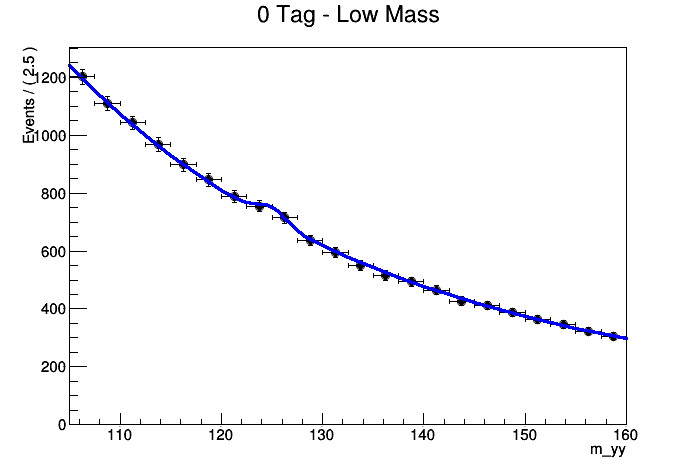

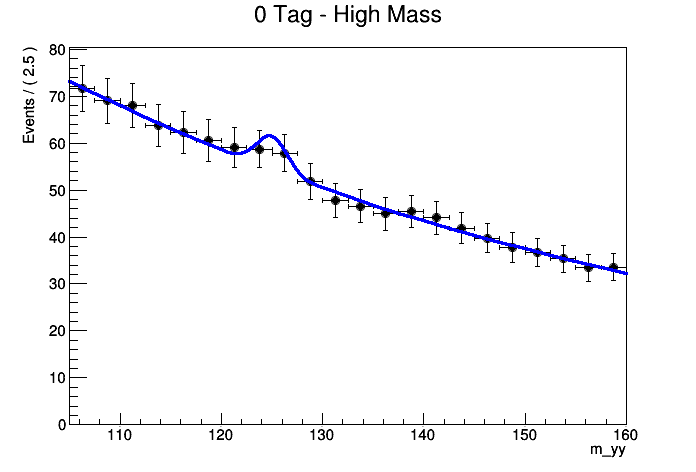

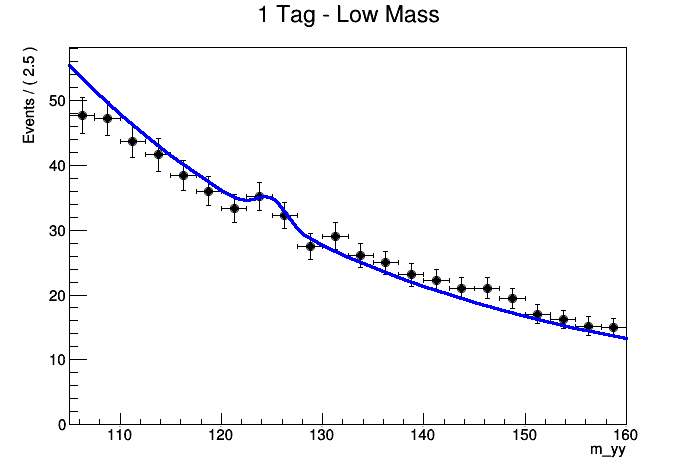

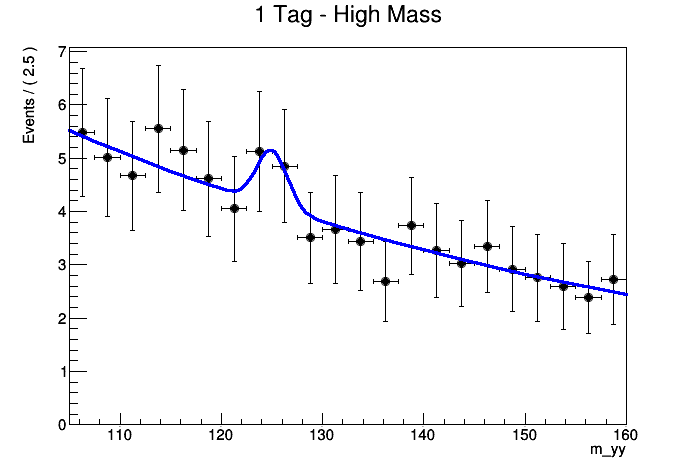

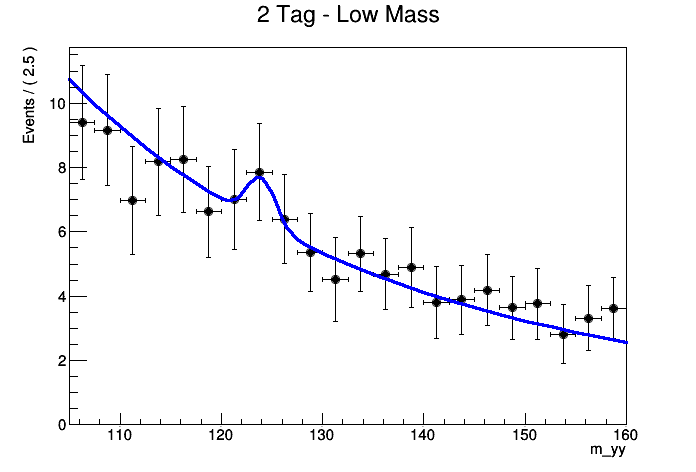

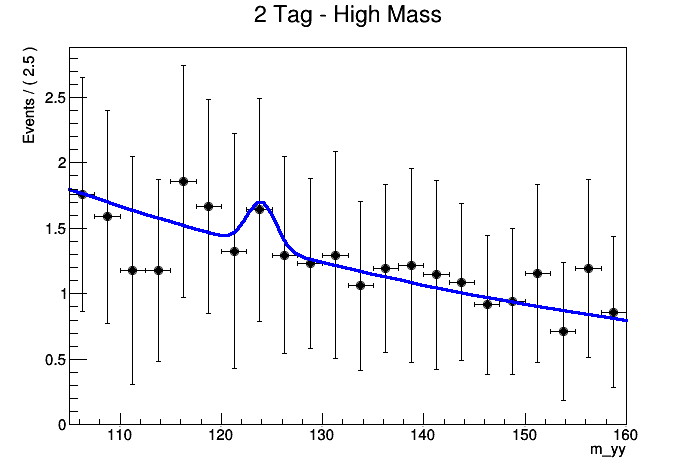

In [63]:
c1 = ROOT.TCanvas()
plot1 = myy.frame(ROOT.RooFit.Title("0 Tag - Low Mass"))
data_combo.plotOn(plot1,ROOT.RooFit.Cut("cat==cat::tag0low"))
w.pdf("jointmodel").plotOn(plot1, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag0low"))
plot1.Draw()
c1.Draw()

c2 = ROOT.TCanvas()
plot2 = myy.frame(ROOT.RooFit.Title("0 Tag - High Mass"))
data_combo.plotOn(plot2,ROOT.RooFit.Cut("cat==cat::tag0high"))
w.pdf("jointmodel").plotOn(plot2, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag0high"))
plot2.Draw()
c2.Draw()

c3 = ROOT.TCanvas()
plot3 = myy.frame(ROOT.RooFit.Title("1 Tag - Low Mass"))
data_combo.plotOn(plot3,ROOT.RooFit.Cut("cat==cat::tag1low"))
w.pdf("jointmodel").plotOn(plot3, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag1low"))
plot3.Draw()
c3.Draw()

c4 = ROOT.TCanvas()
plot4 = myy.frame(ROOT.RooFit.Title("1 Tag - High Mass"))
data_combo.plotOn(plot4,ROOT.RooFit.Cut("cat==cat::tag1high"))
w.pdf("jointmodel").plotOn(plot4, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag1high"))
plot4.Draw()
c4.Draw()

c5 = ROOT.TCanvas()
plot5 = myy.frame(ROOT.RooFit.Title("2 Tag - Low Mass"))
data_combo.plotOn(plot5,ROOT.RooFit.Cut("cat==cat::tag2low"))
w.pdf("jointmodel").plotOn(plot5, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag2low"))
plot5.Draw()
c5.Draw()

c6 = ROOT.TCanvas()
plot6 = myy.frame(ROOT.RooFit.Title("2 Tag - High Mass"))
data_combo.plotOn(plot6,ROOT.RooFit.Cut("cat==cat::tag2high"))
w.pdf("jointmodel").plotOn(plot6, ROOT.RooFit.ProjWData(data_combo),ROOT.RooFit.Slice(w.cat("cat"),"tag2high"))
plot6.Draw()
c6.Draw()

Okay whatever, we don't actually expect these fits to work without setting realistic expectations for the number of events, the boundaries on the resolution parameter etc.
The point was just to do a simultaneous fit in 6 categories.

$$\text{PDF}_{0tag,lowmass} = [\color{red}{n_{noH,0tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + \mu_{1H}\cdot \color{red}{n_{1H,0tag,
}}(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,0tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,0tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{1tag,lowmass} = [\color{red}{n_{noH,1tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,1tag,lowmass}}+\mu_{2H}\cdot \color{red}{n_{2H,1tag,lowmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,1tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,1tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{2tag,lowmass} = [\color{red}{n_{noH,2tag,lowmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,lowmass},a_{1,lowmass},a_{2,lowmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,2tag,lowmass}}+\mu_{2H}\cdot \color{red}{n_{2H,2tag,lowmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};\color{red}{m_{0,2tag,lowmass}}(\theta_A),\color{red}{\sigma_{0,2tag,lowmass}}(\theta_B),\alpha_\text{low, lowmass},\alpha_\text{high, lowmass}, n_\text{low, lowmass}, n_\text{high, lowmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{0tag,highmass} = [\color{red}{n_{noH,0tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + \mu_{1H}\cdot \color{red}{n_{1H,0tag,highmass}}(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{1tag,highmass} = [\color{red}{n_{noH,1tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,1tag,highmass}}+\mu_{2H}\cdot \color{red}{n_{2H,1tag,highmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

$$\text{PDF}_{2tag,highmass} = [\color{red}{n_{noH,2tag,highmass}}\cdot f_{\text{epoly2}}(m_{\gamma\gamma};a_{0,highmass},a_{1,highmass},a_{2,highmass}) + (\mu_{1H}\cdot \color{red}{n_{1H,2tag,highmass}}+\mu_{2H}\cdot \color{red}{n_{2H,2tag,highmass}})(1 + 0.3*\theta_A)(1 + 0.05*\theta_B)\cdot f_{\text{DSCB}}(m_{\gamma\gamma};m_0(\theta_A),\sigma_0(\theta_B),\alpha_\text{low,highmass},\alpha_\text{high,highmass}, n_\text{low,highmass}, n_\text{high,highmass})] \cdot \text{Gauss}(\theta_A; \theta_{A0}, 1) \cdot \text{Gauss}(\theta_B; \theta_{B0}, 1)$$

In [64]:
import ROOT.RooStats as rs

In [65]:
mconfig = rs.ModelConfig(w)
mconfig.SetPdf(w.pdf("jointmodel"))
mconfig.SetParametersOfInterest(ROOT.RooArgSet(w.var("mu_2H")))
mconfig.SetObservables(ROOT.RooArgSet(w.var("myy")))
mconfig.SetNuisanceParameters(ROOT.RooArgSet(w.var("theta_yield"), w.var("EG_RES"), w.var("EG_SCALE"),
                                             w.var("n_bias_tag2high_2H"),  w.var("n_bias_tag2low_2H"),
                                            w.var("n_bias_tag1high_2H"),  w.var("n_bias_tag1low_2H")))
mconfig.SetGlobalObservables(ROOT.RooArgSet(w.var("theta_yield_global"), w.var("EG_SCALE_global"), w.var("EG_RES_global"),
                                            w.var("n_bias_tag2high_2H_global"),  w.var("n_bias_tag2low_2H_global"),
                                            w.var("n_bias_tag1high_2H_global"),  w.var("n_bias_tag1low_2H_global")
                                           ))

In [66]:
mconfig.SetName('model')
mconfig.Print()


=== Using the following for model ===
Observables:             RooArgSet:: = (myy)
Parameters of Interest:  RooArgSet:: = (mu_2H)
Nuisance Parameters:     RooArgSet:: = (theta_yield,EG_RES,EG_SCALE,n_bias_tag2high_2H,n_bias_tag2low_2H,n_bias_tag1high_2H,n_bias_tag1low_2H)
Global Observables:      RooArgSet:: = (theta_yield_global,EG_SCALE_global,EG_RES_global,n_bias_tag2high_2H_global,n_bias_tag2low_2H_global,n_bias_tag1high_2H_global,n_bias_tag1low_2H_global)
PDF:                     RooSimultaneous::jointmodel[ indexCat=cat tag0high=constr_tag0high tag0low=constr_tag0low tag1high=constr_tag1high tag1low=constr_tag1low tag2high=constr_tag2high tag2low=constr_tag2low ] = 0.000607142



In [67]:
sb_model = mconfig
poi = sb_model.GetParametersOfInterest().first()
b_model = sb_model.Clone()
b_model.SetName(sb_model.GetName()+"_with_poi_0")
oldval = poi.getVal()
poi.setVal(0)
b_model.SetSnapshot(ROOT.RooArgSet(poi))
poi.setVal(oldval)

In [68]:
ac = rs.AsymptoticCalculator(data_combo, b_model, sb_model)
ac.SetOneSided(True)

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] ERROR:InputArguments -- AsymptoticCalculator::Initialize - Null model needs a snapshot. Set using modelconfig->SetSnapshot(poi).


In [69]:
calc = rs.HypoTestInverter(ac)
calc.SetConfidenceLevel(0.95)
calc.UseCLs(True)

[#1] INFO:InputArguments -- HypoTestInverter ---- Input models: 
		 using as S+B (null) model     : model
		 using as B (alternate) model  : model_with_poi_0



In [70]:
calc.SetFixedScan(10, 0, 0.05)#poi.getMin(), poi.getMax())

In [71]:
r = calc.GetInterval()

[#1] INFO:Eval -- HypoTestInverter::GetInterval - run a fixed scan
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize - Find  best unconditional NLL on observed data
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 EG_RES      -9.11398e-02  1.09611e+00   -1.00000e+01  1.00000e+01
     2 EG_SCALE    -1.68030e-02  1.63419e-02   -1.00000e+01  1.00000e+01
     3 mu_2H        0.00000e+00  2.32693e-04    0.00000e+00  2.00000e+01
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 n_bias_tag1high_2H  -3.

In [72]:
print r.UpperLimit()
print r.UpperLimitEstimatedError()

0.0320778578358
0.0


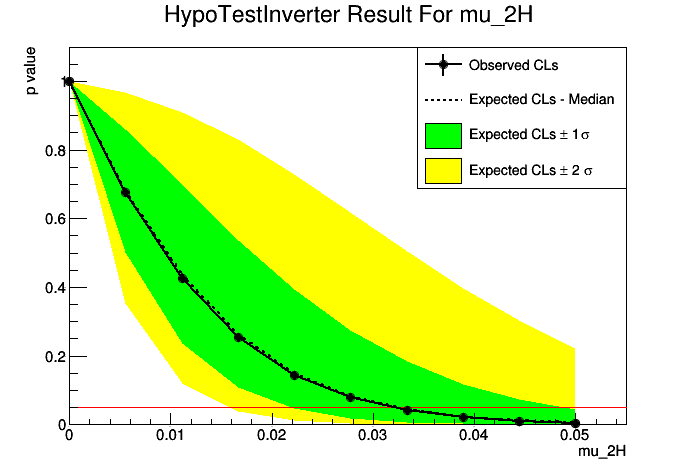

In [73]:
c = ROOT.TCanvas()
plot = rs.HypoTestInverterPlot(r)
plot.Draw()
c.Draw()

In [74]:
# if you set the confidence interval above to 0.683, then the red line moves up